### "Data-Driven Car Price Estimation Model for Kijiji: Leveraging Machine Learning to Optimize Price Suggestions"

### Importing relevant Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
warnings.filterwarnings('ignore')

## 1. Data Identification and Acquisition

In [3]:
## Getting the data from the csv file 
df=pd.read_csv("AdData.csv")

In [314]:
df

,AdID,city,latitude,longitude,mapAddress,title,price,saleby,make,model,...,Date,visit,No of door,No of seats,Transmission,push button start,parking assist,sunroof,alloy wheels,VIN
0,1623070279,Burnaby/New Westminster,NaN,NaN,NaN,Suzuki Jimny 2006,14999,owner,Suzuki,other,...,"06/27/2022, 20:16:56",NaN,3,4,1.0,NaN,NaN,NaN,NaN,NaN
1,1623097429,Delta/Surrey/Langley,NaN,NaN,NaN,Mustang cobra 99,26000,owner,Ford,mustang,...,"06/28/2022, 03:02:22",2026.0,2,4,1.0,NaN,NaN,NaN,NaN,NaN
2,1595531267,Delta/Surrey/Langley,NaN,NaN,NaN,2006 Nissan Frontier SE 4X4 - Local BC | No Ac...,13995,owner,Nissan,frontier,...,"06/28/2022, 22:53:29",795.0,4,5,2.0,NaN,NaN,NaN,1.0,NaN
3,1623215000,Delta/Surrey/Langley,NaN,NaN,NaN,1985 Chevy 1500,3300,owner,Chevrolet,ck_pickup_1500,...,"06/29/2022, 10:30:00",1020.0,4,5,2.0,NaN,NaN,NaN,NaN,NaN
4,1623286366,Delta/Surrey/Langley,NaN,NaN,NaN,2006 Volkswagen Jetta TDI,2700,owner,volkswagen,jetta,...,"06/29/2022, 14:28:28",1396.0,4,5,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51338,m3294444,Calgary,NaN,NaN,NaN,"2022 Dodge Durango R/T Tow N' Go, Brembo Brakes",71730,dealer,Dodge,durango,...,"02/25/2022, 03:11:49",258.0,4,6,2.0,1.0,1.0,NaN,NaN,NaN
51339,m3923859,Calgary,NaN,NaN,NaN,2022 GMC Sierra 3500HD Chassis SLE,74573,dealer,Gmc,other,...,"05/28/2022, 04:28:10",106.0,2,2,2.0,1.0,NaN,NaN,NaN,NaN
51340,m4598519,Calgary,NaN,NaN,NaN,2022 Chevrolet Bolt EV 1LT,35336,dealer,Chevrolet,other,...,"08/26/2022, 04:29:40",3.0,4,5,2.0,1.0,1.0,NaN,NaN,NaN
51341,m4598752,Calgary,NaN,NaN,NaN,2023 Jeep JLJL74,0,dealer,Jeep,other,...,"08/26/2022, 04:39:10",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [315]:
## This will give us the info related to the Type of columns we have and the number of records in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51343 entries, 0 to 51342
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AdID               51343 non-null  object 
 1   city               51343 non-null  object 
 2   latitude           0 non-null      float64
 3   longitude          0 non-null      float64
 4   mapAddress         0 non-null      float64
 5   title              51342 non-null  object 
 6   price              51343 non-null  int64  
 7   saleby             51343 non-null  object 
 8   make               51343 non-null  object 
 9   model              51343 non-null  object 
 10  Trim               44143 non-null  object 
 11  year               51343 non-null  int64  
 12  condition          51343 non-null  object 
 13  Kilometers         51343 non-null  int64  
 14  body               51343 non-null  object 
 15  Drivetrain         47557 non-null  object 
 16  fueltype           475

In [316]:
df.shape

(51343, 28)

In [317]:
## In total we have more 50K records with 28 columns in our data.

In [318]:
## This will give the statistical calculation of our data.
df.describe(include="all")

,AdID,city,latitude,longitude,mapAddress,title,price,saleby,make,model,...,Date,visit,No of door,No of seats,Transmission,push button start,parking assist,sunroof,alloy wheels,VIN
count,51343,51343,0.0,0.0,0.0,51342,5.134300e+04,51343,51343,51343,...,51343,50541.000000,34665,31829,47339.000000,17088.000000,12068.000000,11710.000000,18601.000000,0.0
unique,51342,12,NaN,NaN,NaN,38931,NaN,2,65,741,...,44851,NaN,6,16,NaN,NaN,NaN,NaN,NaN,NaN
top,m4320099,Calgary,NaN,NaN,NaN,2022 Ram 1500 Classic WARLOCK,NaN,dealer,Ford,other,...,"07/19/2022, 19:04:01",NaN,4,5,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,17176,NaN,NaN,NaN,179,NaN,38132,6535,5518,...,12,NaN,28880,22131,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.719879e+04,NaN,NaN,NaN,...,NaN,294.065333,NaN,NaN,1.929994,0.991983,0.989228,0.991119,0.996237,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4.422589e+05,NaN,NaN,NaN,...,NaN,858.379622,NaN,NaN,0.295730,0.089182,0.103233,0.093825,0.061231,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.357000e+04,NaN,NaN,NaN,...,NaN,15.000000,NaN,NaN,2.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.929500e+04,NaN,NaN,NaN,...,NaN,75.000000,NaN,NaN,2.000000,1.000000,1.000000,1.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.999500e+04,NaN,NaN,NaN,...,NaN,261.000000,NaN,NaN,2.000000,1.000000,1.000000,1.000000,1.000000,NaN


### The columns which are more relevant to our business case are :- city,price,make, model,year,condition,Kilometers,fueltype,color,No of door,and No of seats

In [319]:
df.columns

Index(['AdID', 'city', 'latitude', 'longitude', 'mapAddress', 'title', 'price',
       'saleby', 'make', 'model', 'Trim', 'year', 'condition', 'Kilometers',
       'body', 'Drivetrain', 'fueltype', 'color', 'Date', 'visit',
       'No of door', 'No of seats', 'Transmission', 'push button start',
       'parking assist', 'sunroof', 'alloy wheels', 'VIN'],
      dtype='object')

## 2. Data Cleansing and Preprocessing:

### Function to create a heap_map for the data 

In [320]:
def plot_correlation_heatmap(data_frame, input_title):
    
    correlation_matrix = data_frame.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(input_title)
    plt.show()

In [ ]:
## Calling the function to create the Heatmap to visualize the initial correaltion between the attributes.
plot_correlation_heatmap(df, "Correlation Matrix Heatmap Before Data Cleaning")

As we can see the intial correaltion has only the numerical columns not the categorical. But from the above Map we can say that the kilometers visit year have corelation, but we can determine the actual attruibutes before cleaning the data

### Handling Missing values !!!

In [322]:
df.isnull().sum()

AdID                     0
city                     0
latitude             51343
longitude            51343
mapAddress           51343
title                    1
price                    0
saleby                   0
make                     0
model                    0
Trim                  7200
year                     0
condition                0
Kilometers               0
body                     0
Drivetrain            3786
fueltype              3790
color                 2508
Date                     0
visit                  802
No of door           16678
No of seats          19514
Transmission          4004
push button start    34255
parking assist       39275
sunroof              39633
alloy wheels         32742
VIN                  51343
dtype: int64

### Plotting the Bar graph for the missing values

<function matplotlib.pyplot.show(close=None, block=None)>

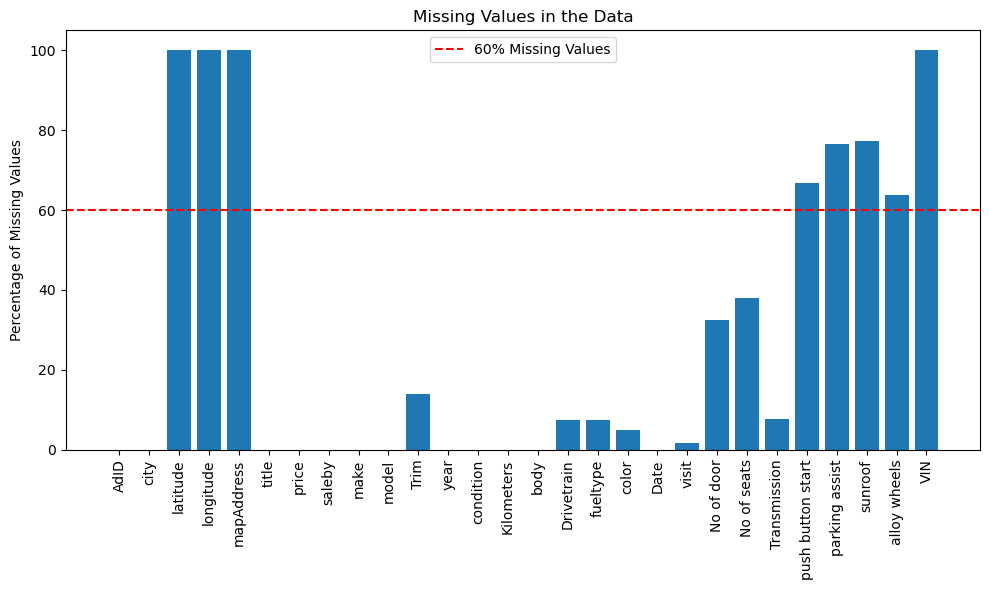

In [323]:
## Calculating the percenatage of the null values
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

## create the bar chart of the missing values.
plt.figure(figsize=(10, 6))
plt.bar(missing_values_percentage.index, missing_values_percentage.values)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values in the Data')

## Drawing a line at 60% of missing values
plt.axhline(y=60, color='red', linestyle='--', label='60% Missing Values')

plt.tight_layout()
plt.legend()
plt.show


### Dropping the columns whose missing values are more than 60%

In [324]:
columns_to_keep = missing_values_percentage[missing_values_percentage <= 60].index

# Drop the columns with more than 60% missing values
df = df[columns_to_keep]

In [325]:
df.isnull().sum()

AdID                0
city                0
title               1
price               0
saleby              0
make                0
model               0
Trim             7200
year                0
condition           0
Kilometers          0
body                0
Drivetrain       3786
fueltype         3790
color            2508
Date                0
visit             802
No of door      16678
No of seats     19514
Transmission     4004
dtype: int64

In [326]:
df['No of seats'].unique().tolist()

['4',
 '5',
 '6',
 nan,
 '2',
 '7',
 '3',
 'other',
 '8',
 '1',
 '9',
 '21',
 '12',
 '44',
 '15',
 '24',
 '10']

### Handling the missing values of these columns 'title', 'Trim', 'Drivetrain', 'fueltype', 'color'  by using "other" in place of nan

In [327]:
# List of columns to be considered
columns_to_replace = ['title', 'Trim', 'Drivetrain', 'fueltype', 'color']

# Replacing the missing values with other
df[columns_to_replace] = df[columns_to_replace].fillna('other')

C:\Users\zumai\AppData\Local\Temp\ipykernel_3208\3581042247.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_replace] = df[columns_to_replace].fillna('other')


### Handling these columns Transmissionm and visit by filling it by its mode

In [328]:
# Replacing missing values in 'Transmission' column with mode
transmission_mode = df['Transmission'].mode()[0]
df['Transmission'].fillna(transmission_mode, inplace=True)

# Replacing missing values in 'visit' column with mode
visit_mode = df['visit'].mode()[0]
df['visit'].fillna(visit_mode, inplace=True)

C:\Users\zumai\AppData\Local\Temp\ipykernel_3208\1221636653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transmission'].fillna(transmission_mode, inplace=True)
C:\Users\zumai\AppData\Local\Temp\ipykernel_3208\1221636653.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visit'].fillna(visit_mode, inplace=True)


### Dealing with 'No of door' column

In [329]:
df['No of door'].unique().tolist()

['3', '2', '4', nan, '5', 'others', '6']

As we know that the number of door in a car will be either 2 or 4 but we see that some has values 3,5,6 and others. So we will first delete the rows which has other as the value and then we will replace the value 3 with 2 and 5,6 with 4 for number of doors, then after that we will handle missing values using the mode operation

In [330]:
## Deleting the rows which has other as the value
df= df[df['No of door'] != 'others']

### Replacing the values 3 with 2, and 5, 6 with 4 for number of doors
df['No of door'].replace({'3': '2', '5': '4', '6': '4'}, inplace=True)

# Replacing missing values in 'doors' column with mode
doors_mode = df['No of door'].mode()[0]
df['No of door'].fillna(doors_mode, inplace=True)

In [331]:
# Convert the 'No of door' column to integer data type
df['No of door'] = df['No of door'].astype(int)

### Dealing with 'No of seats' column

In [332]:
df['No of seats'].unique().tolist()

['4',
 '5',
 '6',
 nan,
 '2',
 '7',
 '3',
 'other',
 '8',
 '1',
 '9',
 '21',
 '12',
 '44',
 '15',
 '24',
 '10']

In [333]:
df['No of seats'].value_counts()

5        22127
7         3051
4         2423
6         2007
2         1183
8          410
3          329
other      156
1           65
12           6
9            3
44           3
15           3
10           3
21           1
24           1
Name: No of seats, dtype: int64

For this column as we see that we have a lot inappropriate values in the column like 15, 10, 24 ..... for number of seats. So we will delete all the wrong values from the data   

In [334]:
# Defining the invalid range of values for 'No of seats' (e.g., ,3, 1, 9, 24, etc.)
valid_seats = ['3','other','1','9','21','12','44','15','24','10']

# Filter out rows with inappropriate 'No of seats' values using not in 
df=df[~df['No of seats'].isin(valid_seats)]

In [335]:
## using mode to fill out the missing values
seats_mode = df['No of seats'].mode()[0]
df['No of seats'].fillna(seats_mode, inplace=True)

In [336]:
df.isnull().sum()

AdID            0
city            0
title           0
price           0
saleby          0
make            0
model           0
Trim            0
year            0
condition       0
Kilometers      0
body            0
Drivetrain      0
fueltype        0
color           0
Date            0
visit           0
No of door      0
No of seats     0
Transmission    0
dtype: int64

## All the Missing Values has beed removed !!!

## Outliers Detection

Using ***IQR method***

Basically in IQR method- To define the range of values that are considered to be outliers, we calculate lower bound as Q1 minus 1.5 times the IQR and the upper bound as Q3 plus 1.5 times the IQR, Any data point which comes outside this range are considered as potential outliers

### Function to find the Outliers using IQR method

In [337]:
def find_outliers(column):
    
    ## Calling our function for creating the quartiles
    quartile_1 = column.quantile(0.25)
    quartile_3 = column.quantile(0.75)
    
    ## Calling the function for calculating the IQR 
    iqr = quartile_3 - quartile_1
    
   ## Calculating the  Lower and upper range
    lower_range = quartile_1 - 1.5 * iqr
    upper_range = quartile_3 + 1.5 * iqr
    
    ## Checking if the data point meets either one of the condition , if yes then consider as outliers
    result=column[(column < lower_range) | (column > upper_range)]
    
    return result

### Function to find the outliers using the Z-score

In [338]:
def find_outliers_zscore(data_series, threshold=3):
    mean = data_series.mean()
    std = data_series.std()
    z_scores = (data_series - mean) / std
    outliers = data_series[abs(z_scores) > threshold]
    return outliers

### Function to plot the the outliers

In [339]:
def plot_price_distribution_with_outliers(outlier_values, title):

    # Create KDE plot to visualize the distribution of 'price' column with outliers marked
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x='price', fill=True, common_norm=False, color='b', label='Price Distribution')
    sns.scatterplot(x=outlier_values, y=[0.0] * len(outlier_values), color='r', marker='X', label='Outliers')
    plt.xlabel('Price')
    plt.title(title)
    plt.legend()
    plt.show()

### Function to plot the distribution after removiong the outliers

In [340]:
def plot_without_outliers(df,title):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x='price', fill=True, common_norm=False, color='b', label='Price Distribution')
    plt.xlabel('Price')
    plt.title(title)
    plt.legend()
    plt.show()

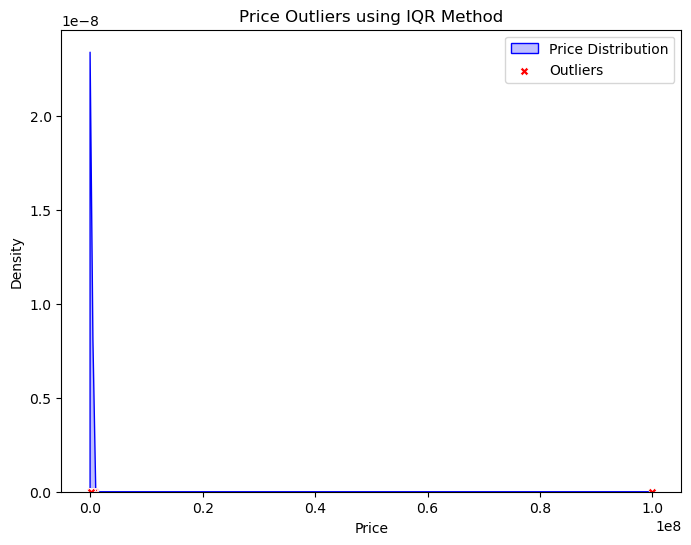

In [341]:
## Calling the function to find the outliers using IQR method then plotting it 
price_outliers = find_outliers(df['price'])
plot_price_distribution_with_outliers(price_outliers,'Price Outliers using IQR Method')

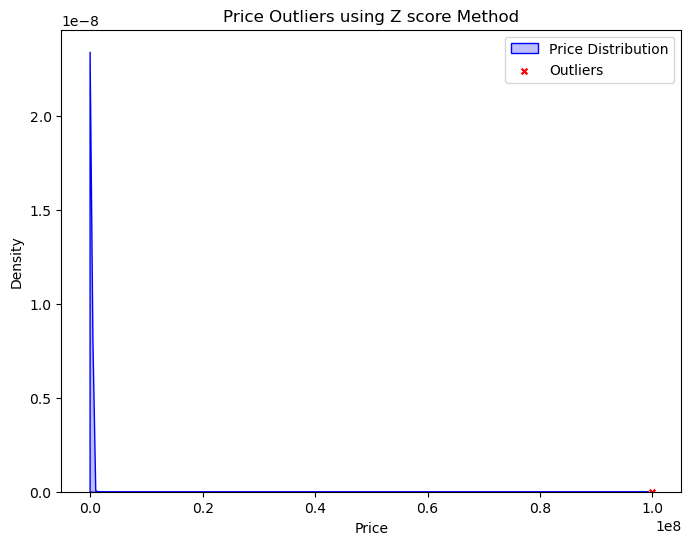

In [342]:
## calling the fuction to get the outliers using z-score and then plotting it
price_outliers_zscore = find_outliers_zscore(df['price'])
plot_price_distribution_with_outliers(price_outliers_zscore, 'Price Outliers using Z score Method')

***Z-score turned to be the most effective for handling the outliers so removing the outliers using the z-score method and then plotting the distribution***

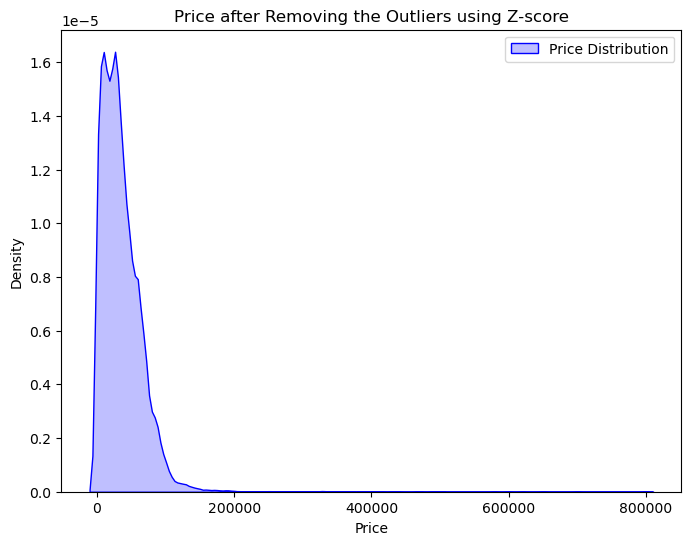

In [343]:
## removing the outliers using z-score and then plotting
df = df[~df['price'].isin(price_outliers_zscore)]
plot_without_outliers(df,'Price after Removing the Outliers using Z-score')

## 3. Data Analysis and Feature Engineering 

### Handling Price column

In [344]:
df['price'].value_counts()

0         2792
7500       233
5000       227
3500       218
6500       215
          ... 
120404       1
66484        1
65779        1
25597        1
35336        1
Name: price, Length: 12369, dtype: int64

In [345]:
### getting the count of the price with respect to the digits, here we have one digit price and two digit price 
df[df['price'].astype(str).str.len()<3]['price'].value_counts()

0     2792
1       17
10       6
70       4
5        3
45       3
50       3
60       2
80       2
99       1
68       1
72       1
90       1
15       1
79       1
7        1
21       1
30       1
40       1
75       1
35       1
Name: price, dtype: int64

***The price column has price of one digit and two, which in fact is not correct so we will remove these records, These values can affect the performance of the model*** 

In [346]:
## removing these records
df=df[~(df['price'].astype(str).str.len() < 3)]

In [347]:
df.head(5)

,AdID,city,title,price,saleby,make,model,Trim,year,condition,Kilometers,body,Drivetrain,fueltype,color,Date,visit,No of door,No of seats,Transmission
0,1623070279,Burnaby/New Westminster,Suzuki Jimny 2006,14999,owner,Suzuki,other,other,2006,used,37600,wagon,4x4,gas,black,"06/27/2022, 20:16:56",1.0,2,4,1.0
1,1623097429,Delta/Surrey/Langley,Mustang cobra 99,26000,owner,Ford,mustang,cobra,1999,used,5000,coupe_2_door,rwd,other,black,"06/28/2022, 03:02:22",2026.0,2,4,1.0
2,1595531267,Delta/Surrey/Langley,2006 Nissan Frontier SE 4X4 - Local BC | No Ac...,13995,owner,Nissan,frontier,SE,2006,used,227000,pickup_truck,4x4,gas,black,"06/28/2022, 22:53:29",795.0,4,5,2.0
3,1623215000,Delta/Surrey/Langley,1985 Chevy 1500,3300,owner,Chevrolet,ck_pickup_1500,other,1985,used,180000,pickup_truck,4x4,gas,blue,"06/29/2022, 10:30:00",1020.0,4,5,2.0
4,1623286366,Delta/Surrey/Langley,2006 Volkswagen Jetta TDI,2700,owner,volkswagen,jetta,other,2006,used,307000,sedan,fwd,diesel,silver,"06/29/2022, 14:28:28",1396.0,4,5,1.0


In [348]:
## Remove the AdID beacuse it is unique
df = df.drop(columns='AdID')

In [349]:
## Removing the Title as it just contains the info of all the columns
df = df.drop(columns='title')

### Extracting the Day, Month and Year from the Date column and creating new features

In [350]:
# Convert the 'Date' column to a datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Extract day, month, and year into separate columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [351]:
## Now we see that we have already a column named 'year' in the data_frame which contains the info of the manufacturing year of the car, so we will rename that column 
df.rename(columns={'year': 'manufacturing_year'}, inplace=True)

In [352]:
df

,city,price,saleby,make,model,Trim,manufacturing_year,condition,Kilometers,body,...,fueltype,color,Date,visit,No of door,No of seats,Transmission,Day,Month,Year
0,Burnaby/New Westminster,14999,owner,Suzuki,other,other,2006,used,37600,wagon,...,gas,black,2022-06-27 20:16:56,1.0,2,4,1.0,27,6,2022
1,Delta/Surrey/Langley,26000,owner,Ford,mustang,cobra,1999,used,5000,coupe_2_door,...,other,black,2022-06-28 03:02:22,2026.0,2,4,1.0,28,6,2022
2,Delta/Surrey/Langley,13995,owner,Nissan,frontier,SE,2006,used,227000,pickup_truck,...,gas,black,2022-06-28 22:53:29,795.0,4,5,2.0,28,6,2022
3,Delta/Surrey/Langley,3300,owner,Chevrolet,ck_pickup_1500,other,1985,used,180000,pickup_truck,...,gas,blue,2022-06-29 10:30:00,1020.0,4,5,2.0,29,6,2022
4,Delta/Surrey/Langley,2700,owner,volkswagen,jetta,other,2006,used,307000,sedan,...,diesel,silver,2022-06-29 14:28:28,1396.0,4,5,1.0,29,6,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51337,Calgary,89722,dealer,Cadillac,other,Sport,2023,new,0,suv_crossover,...,gas,white,2022-08-05 04:38:10,12.0,4,6,2.0,5,8,2022
51338,Calgary,71730,dealer,Dodge,durango,"R/T Tow N' Go, Brembo Brakes",2022,new,24,suv_crossover,...,gas,white,2022-02-25 03:11:49,258.0,4,6,2.0,25,2,2022
51339,Calgary,74573,dealer,Gmc,other,SLE,2022,new,9,other,...,diesel,black,2022-05-28 04:28:10,106.0,2,2,2.0,28,5,2022
51340,Calgary,35336,dealer,Chevrolet,other,1LT,2022,new,24,wagon,...,electric,white,2022-08-26 04:29:40,3.0,4,5,2.0,26,8,2022


### Checking for duplicate values

In [353]:
df.duplicated().sum()

15

In [354]:
df=df.drop_duplicates()

In [355]:
df.duplicated().sum()

0

## Duplicates Removed !!

In [356]:
df['condition'].unique()

array(['used', 'damaged', 'new', 'salvage', 'lease_takeover'],
      dtype=object)

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47844 entries, 0 to 51342
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   city                47844 non-null  object        
 1   price               47844 non-null  int64         
 2   saleby              47844 non-null  object        
 3   make                47844 non-null  object        
 4   model               47844 non-null  object        
 5   Trim                47844 non-null  object        
 6   manufacturing_year  47844 non-null  int64         
 7   condition           47844 non-null  object        
 8   Kilometers          47844 non-null  int64         
 9   body                47844 non-null  object        
 10  Drivetrain          47844 non-null  object        
 11  fueltype            47844 non-null  object        
 12  color               47844 non-null  object        
 13  Date                47844 non-null  datetime64

## Converting the categorical columns into numerical by creating the new_columns Using Label Encoder

In [358]:
categorical_cols = ['city', 'saleby', 'make', 'model', 'Trim', 'condition', 'body', 'Drivetrain', 'fueltype', 'color']
for col in categorical_cols:
    new_col_name = col + '_encoded'
    label_encoder = LabelEncoder()
    df[new_col_name] = label_encoder.fit_transform(df[col])


C:\Users\zumai\AppData\Local\Temp\ipykernel_3208\770762348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col_name] = label_encoder.fit_transform(df[col])
C:\Users\zumai\AppData\Local\Temp\ipykernel_3208\770762348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col_name] = label_encoder.fit_transform(df[col])
C:\Users\zumai\AppData\Local\Temp\ipykernel_3208\770762348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [359]:
df

,city,price,saleby,make,model,Trim,manufacturing_year,condition,Kilometers,body,...,city_encoded,saleby_encoded,make_encoded,model_encoded,Trim_encoded,condition_encoded,body_encoded,Drivetrain_encoded,fueltype_encoded,color_encoded
0,Burnaby/New Westminster,14999,owner,Suzuki,other,other,2006,used,37600,wagon,...,0,1,54,460,15854,4,8,0,2,1
1,Delta/Surrey/Langley,26000,owner,Ford,mustang,cobra,1999,used,5000,coupe_2_door,...,3,1,17,437,15737,4,1,4,4,1
2,Delta/Surrey/Langley,13995,owner,Nissan,frontier,SE,2006,used,227000,pickup_truck,...,3,1,42,277,11017,4,5,0,2,1
3,Delta/Surrey/Langley,3300,owner,Chevrolet,ck_pickup_1500,other,1985,used,180000,pickup_truck,...,3,1,10,139,15854,4,5,0,2,2
4,Delta/Surrey/Langley,2700,owner,volkswagen,jetta,other,2006,used,307000,sedan,...,3,1,63,356,15854,4,6,2,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51337,Calgary,89722,dealer,Cadillac,other,Sport,2023,new,0,suv_crossover,...,1,0,9,460,12981,2,7,1,2,17
51338,Calgary,71730,dealer,Dodge,durango,"R/T Tow N' Go, Brembo Brakes",2022,new,24,suv_crossover,...,1,0,13,200,10437,2,7,1,2,17
51339,Calgary,74573,dealer,Gmc,other,SLE,2022,new,9,other,...,1,0,19,460,11704,2,4,0,0,1
51340,Calgary,35336,dealer,Chevrolet,other,1LT,2022,new,24,wagon,...,1,0,10,460,275,2,8,2,1,17


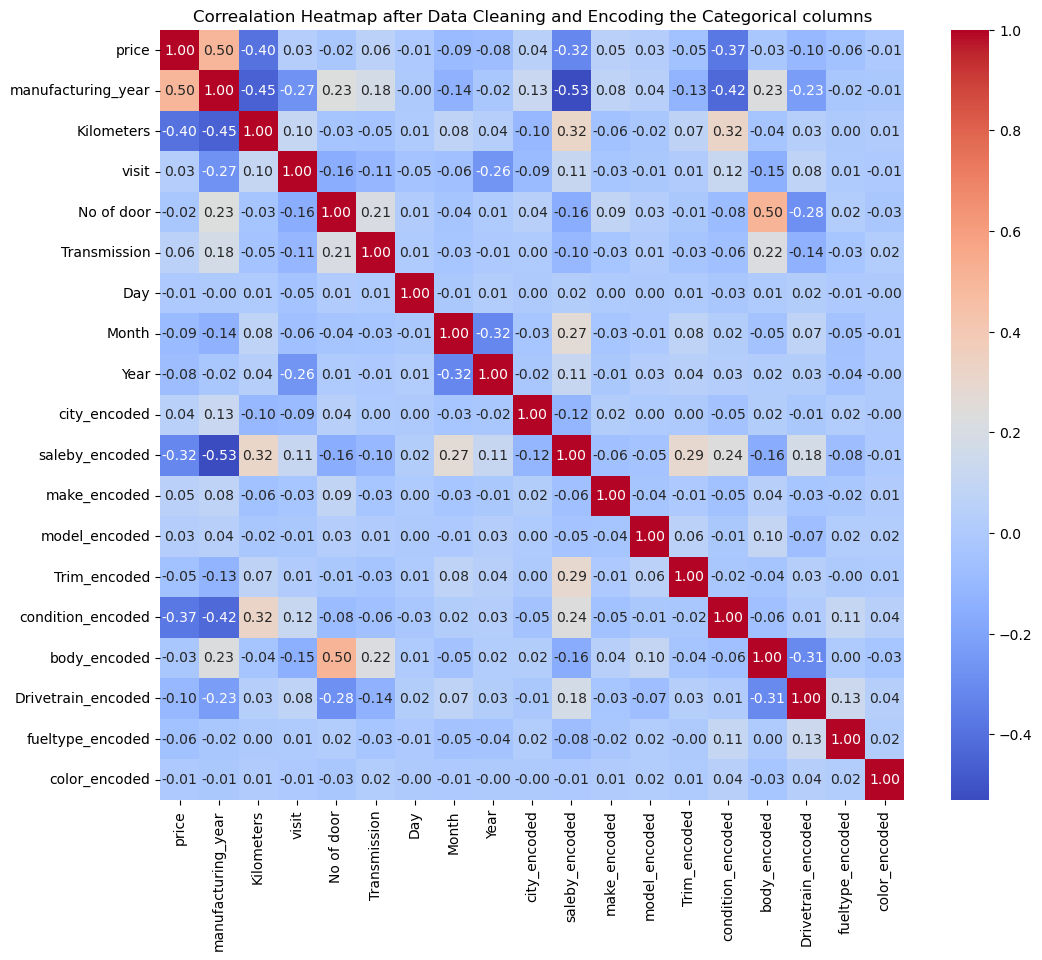

In [361]:
## Calling the function to generate the Heat Map 
plot_correlation_heatmap(df, "Correalation Heatmap after Data Cleaning and Encoding the Categorical columns")

As we can see from the above Map the Price Column is positively and negatively correlated to the features. we will be selecting only the features which are highly correlated to the Price.

## 4. Data Visualization and Representation

In [ ]:
## Function to create the bar plots for the ads

In [367]:
def plot_ads_by_column(data_frame, column_name, palette_name):
    # Group the data by the specified column and count the number of ads
    ads_count = data_frame.groupby(column_name).size().reset_index(name='Count')

    # Plot the number of ads for each category in the column with the specified color palette
    plt.figure(figsize=(10, 6))
    #colour_palette = sns.color_palette(palette_name, as_cmap=True)
    sns.barplot(x=column_name, y='Count', data=ads_count, palette=palette_name)
    plt.xticks(rotation=45)
    plt.xlabel(column_name)
    plt.ylabel('Number of Ads')
    plt.title(f'Number of Ads by {column_name}')
    plt.show()

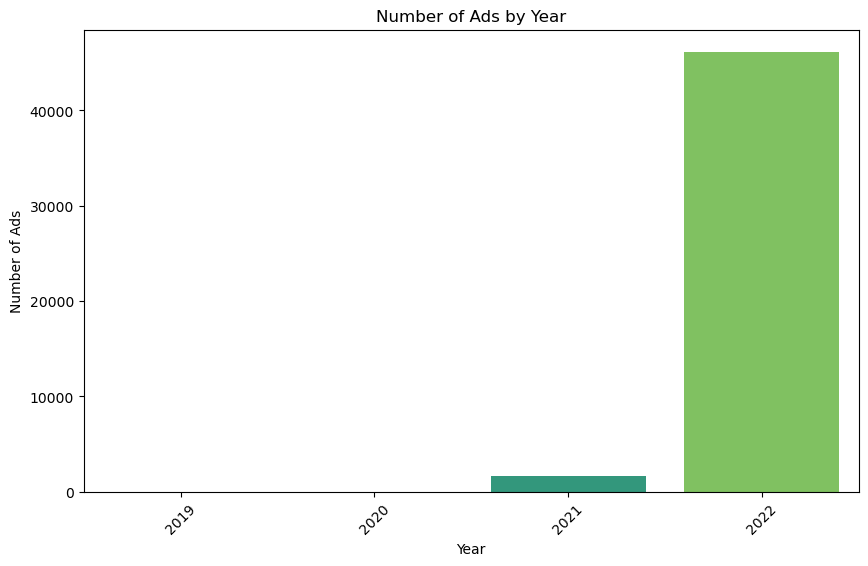

In [368]:
## Calling the function to plot the number of ads by Year 
plot_ads_by_column(df, 'Year', "viridis")

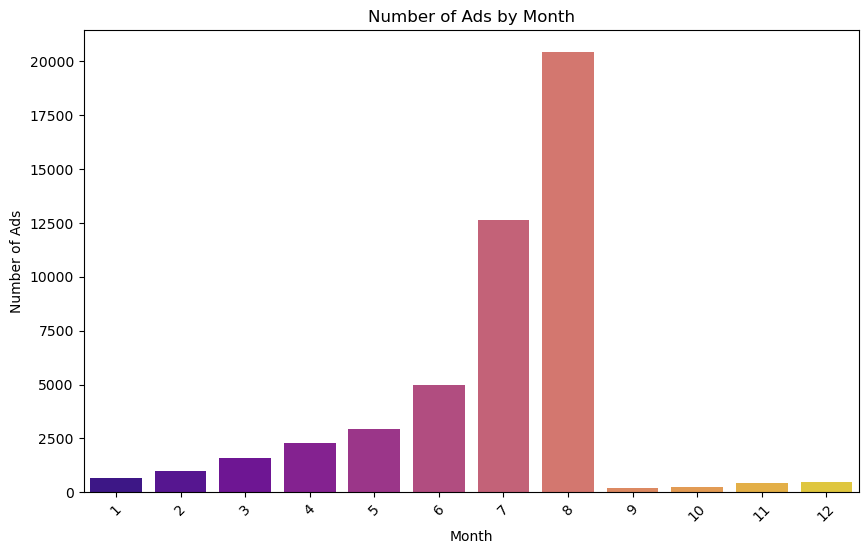

In [371]:
## Calling the function to plot the number of ads by Month 
plot_ads_by_column(df, 'Month', "plasma")

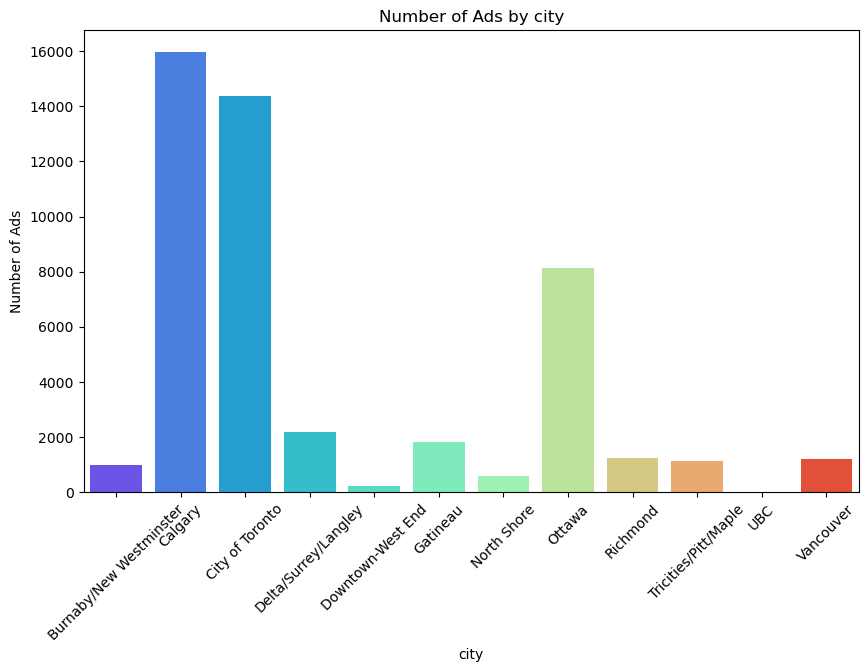

In [374]:
## Calling the function to plot the number of ads by Month 
plot_ads_by_column(df, 'city', "rainbow")

### Plotting monthly Visit by year

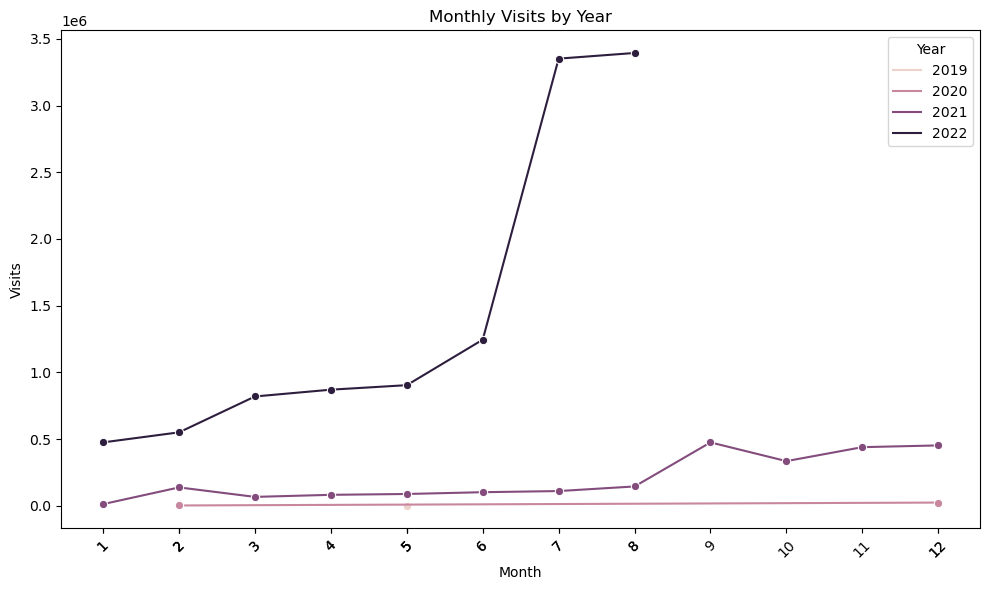

In [405]:
visits_by_month_year = df[["visit", "Year", "Month"]]
visits_by_month_year = visits_by_month_year.groupby(["Year","Month"], as_index=False)["visit"].sum()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=visits_by_month_year, x="Month", y="visit", hue="Year", marker="o")
plt.xlabel("Month")
plt.ylabel("Visits")
plt.title("Monthly Visits by Year")
plt.legend(title="Year")
plt.xticks(visits_by_month_year["Month"], rotation=45)
plt.tight_layout()
plt.show()

### Pie chart to show the distibution of the particular feature

In [1]:
value_counts = df['condition'].value_counts()

# Create a donut chart with a legend
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4))
plt.title('Distribution for the condition of the cars')

# Add a legend
plt.legend(title="Sale By", labels=value_counts.index, loc="upper left")

plt.show()

NameError: name 'df' is not defined

From the above pie chart we can see the distribution for condition of the cars

In [384]:
df

,city,price,saleby,make,model,Trim,manufacturing_year,condition,Kilometers,body,...,city_encoded,saleby_encoded,make_encoded,model_encoded,Trim_encoded,condition_encoded,body_encoded,Drivetrain_encoded,fueltype_encoded,color_encoded
0,Burnaby/New Westminster,14999,owner,Suzuki,other,other,2006,used,37600,wagon,...,0,1,54,460,15854,4,8,0,2,1
1,Delta/Surrey/Langley,26000,owner,Ford,mustang,cobra,1999,used,5000,coupe_2_door,...,3,1,17,437,15737,4,1,4,4,1
2,Delta/Surrey/Langley,13995,owner,Nissan,frontier,SE,2006,used,227000,pickup_truck,...,3,1,42,277,11017,4,5,0,2,1
3,Delta/Surrey/Langley,3300,owner,Chevrolet,ck_pickup_1500,other,1985,used,180000,pickup_truck,...,3,1,10,139,15854,4,5,0,2,2
4,Delta/Surrey/Langley,2700,owner,volkswagen,jetta,other,2006,used,307000,sedan,...,3,1,63,356,15854,4,6,2,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51337,Calgary,89722,dealer,Cadillac,other,Sport,2023,new,0,suv_crossover,...,1,0,9,460,12981,2,7,1,2,17
51338,Calgary,71730,dealer,Dodge,durango,"R/T Tow N' Go, Brembo Brakes",2022,new,24,suv_crossover,...,1,0,13,200,10437,2,7,1,2,17
51339,Calgary,74573,dealer,Gmc,other,SLE,2022,new,9,other,...,1,0,19,460,11704,2,4,0,0,1
51340,Calgary,35336,dealer,Chevrolet,other,1LT,2022,new,24,wagon,...,1,0,10,460,275,2,8,2,1,17


### Generic function to plot the graphs of features with respect to the different feature

In [440]:
def plot_generic(data_frame, year_column, x_column,y_column,input_title,palette_name):

    df_summary = data_frame[[y_column, year_column, x_column]]
    df_summary = df_summary.groupby([year_column, x_column], as_index=False)[y_column].mean()

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_summary, x=x_column, y=y_column, hue=year_column,palette=palette_name)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(input_title)
    plt.legend(title=year_column)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

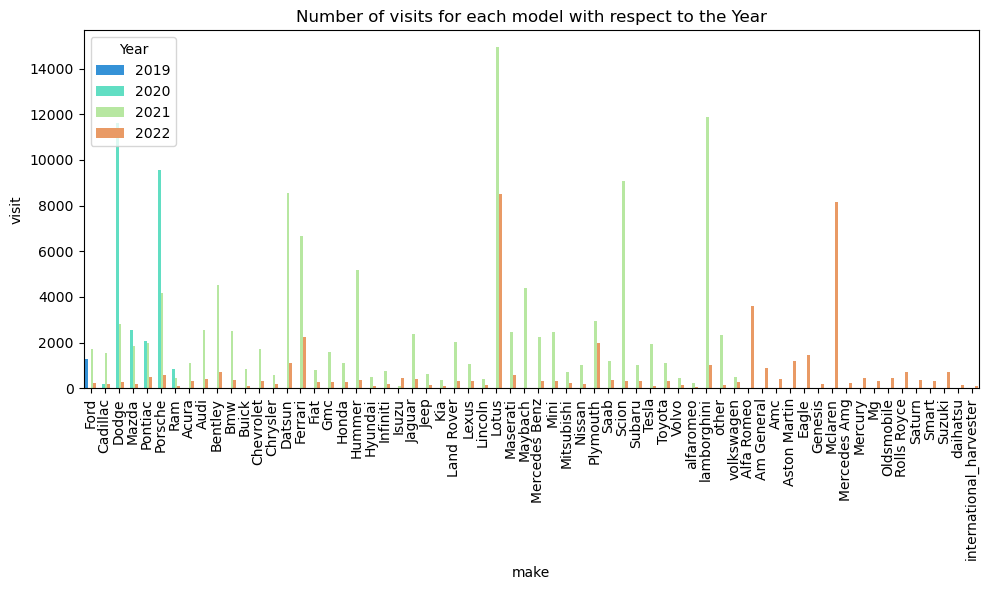

In [441]:
# Call the generic function Number of visits for each model with respect to the Year
plot_generic(df, 'Year', 'make','visit','Number of visits for each model with respect to the Year','rainbow')

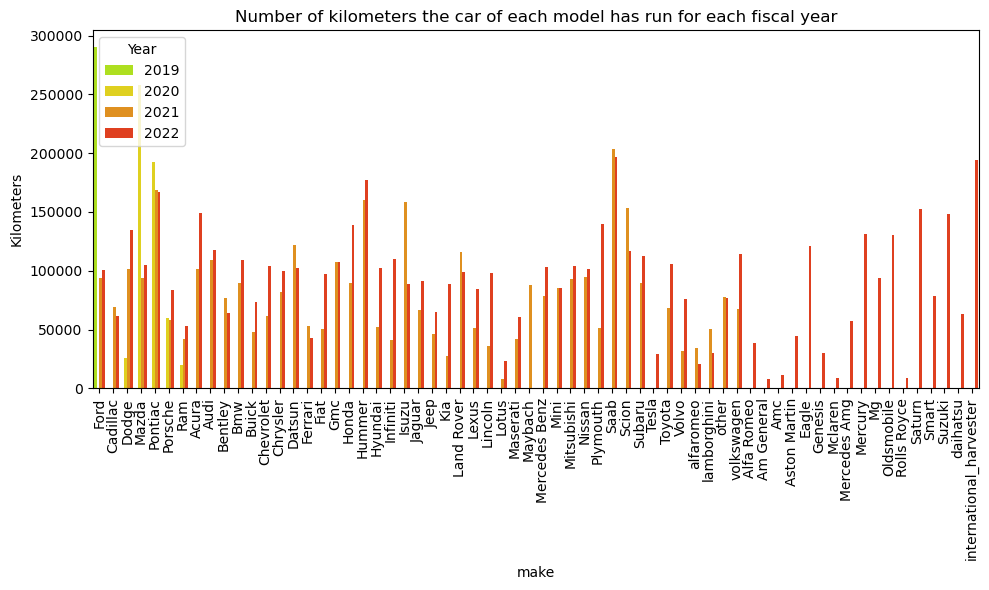

In [442]:
# Call the generic function to get Number of kilometers the car of each model has run for each fiscal year 
plot_generic(df, 'Year', 'make','Kilometers','Number of kilometers the car of each model has run for each fiscal year','prism_r')

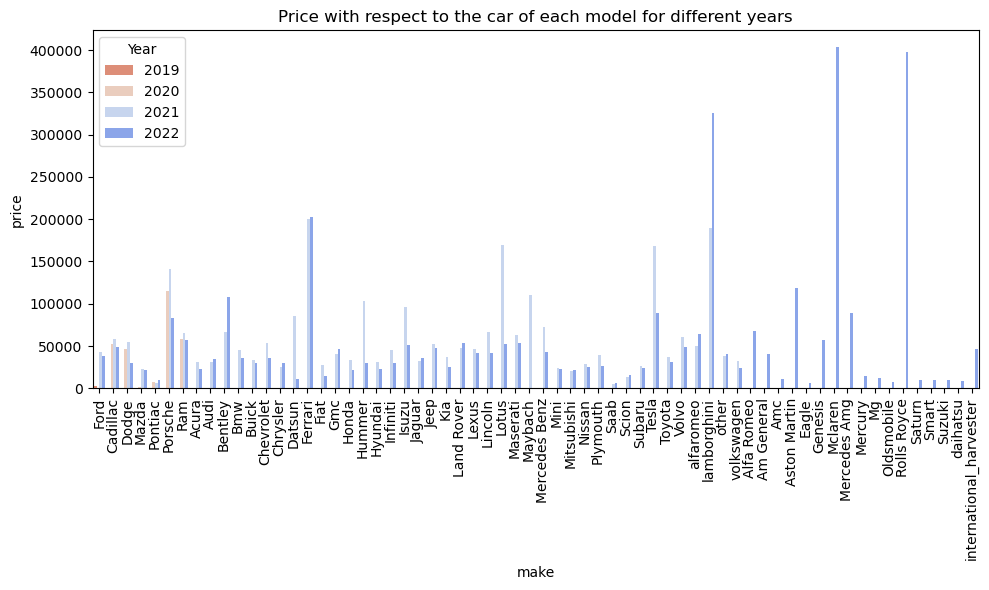

In [450]:
# Call the generic function to get price with respect to the car of each model for different years
plot_generic(df, 'Year', 'make','price','Price with respect to the car of each model for different years','coolwarm_r')

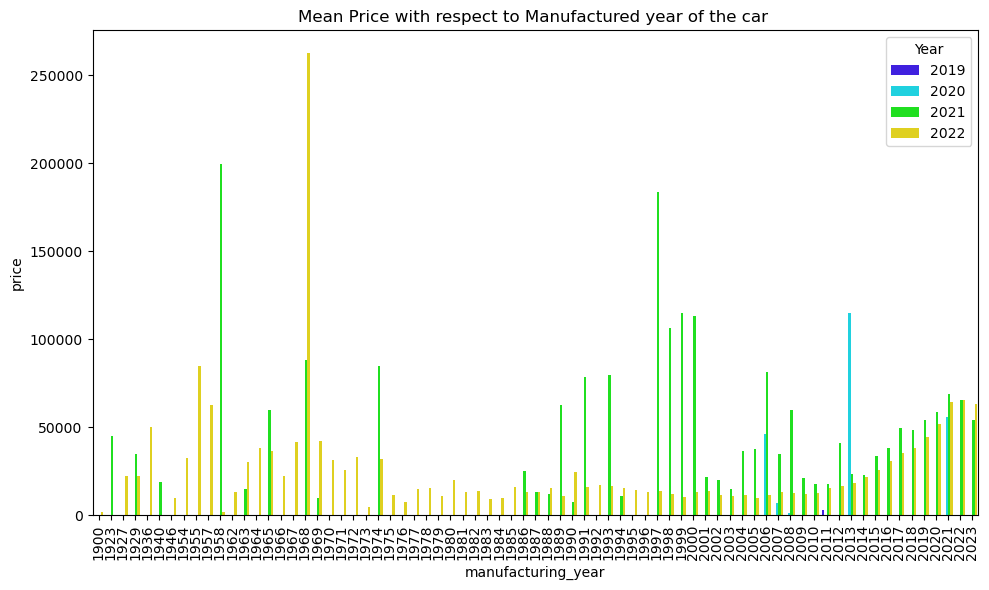

In [455]:
## Call the generic function to get the Mean Price with respect to Manufactured year of the car 
plot_generic(df, 'Year', 'manufacturing_year','price','Mean Price with respect to Manufactured year of the car ','gist_rainbow_r')

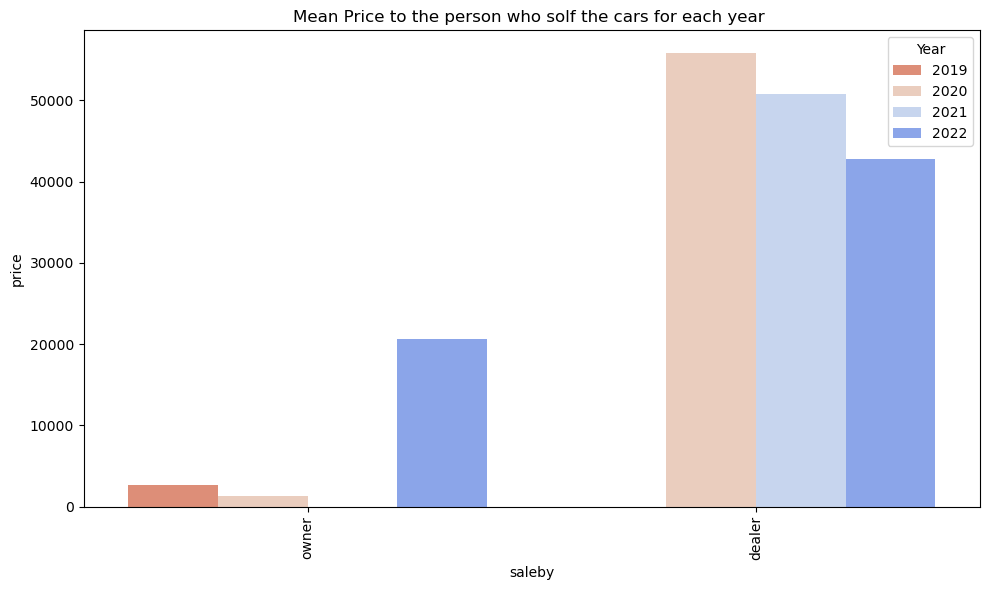

In [459]:
## Call the generic function to get the Mean Price to the person who solf the cars for each year
plot_generic(df, 'Year', 'saleby','price','Mean Price to the person who solf the cars for each year ','coolwarm_r')

## 5. Applying Machine Learning Model:

### Function to create run the model and create the scatter Plot for the Actual and Predicted Price

In [517]:
def model_and_plot_actual_vs_predicted(model, X_test, y_test, feature_name,input_title):
    # Predicting car Price
    y_pred = model.predict(X_test)
    
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error:", mae)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error:", rmse)

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    print("Mean Absolute Percentage Error:", mape)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    print("R-squared:", r2)

    # Plot the actual and predicted prices scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test['make_encoded'], y_test, label='Actual Price', color='blue', alpha=0.5)
    plt.scatter(X_test['make_encoded'], y_pred, label='Predicted Price', color='orange', alpha=0.5)
    plt.xlabel(f"{feature_name} (Encoded)")
    plt.ylabel("Price")
    plt.title(input_title)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Selecting the appropriate features to fit in the model, also specifying the target label  and splitting the data into Train and Test 

In [518]:
# Select only the columns which are highly corelated to the target column 
selected_features = ['make_encoded', 'condition_encoded','manufacturing_year',
                     'model_encoded', 'city_encoded', 'Drivetrain_encoded', 'fueltype_encoded']

# Create a new DataFrame with the selected features and the target variable 'price'
X = df[selected_features]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Using Random Forest Regressor

Mean Absolute Error: 6529.135476558909
Root Mean Squared Error: 13589.691675281983
Mean Absolute Percentage Error: 38.097297777585275
R-squared: 0.7802402437436757


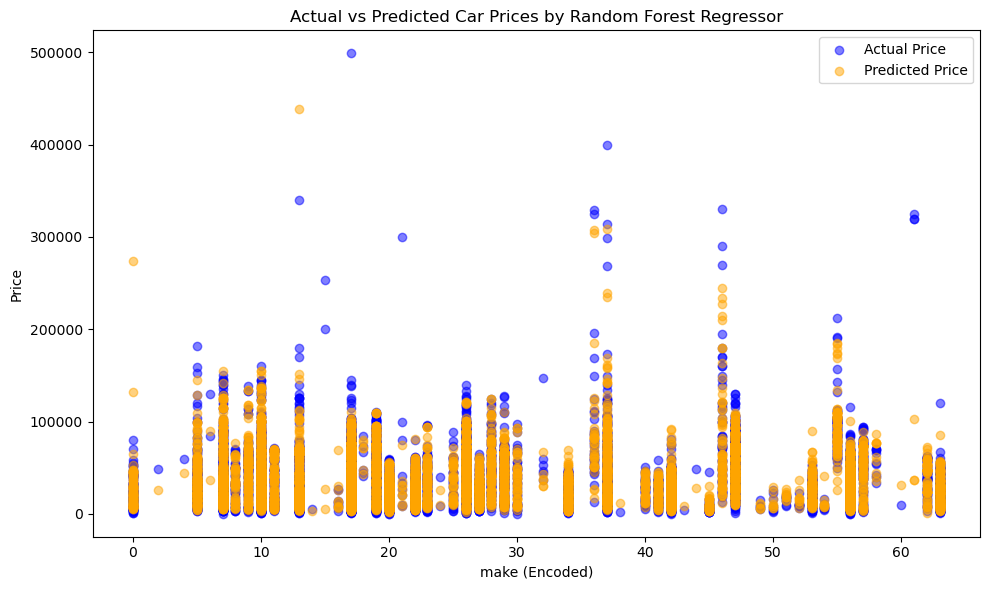

In [519]:
### calling the function to create the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
model_and_plot_actual_vs_predicted(rf_model, X_test, y_test,'make','Actual vs Predicted Car Prices by Random Forest Regressor')

### Using Gradient Boosting Regressor

Mean Absolute Error: 9246.105479142283
Root Mean Squared Error: 16653.500800698625
Mean Absolute Percentage Error: 52.34423864986281
R-squared: 0.6699801654587745


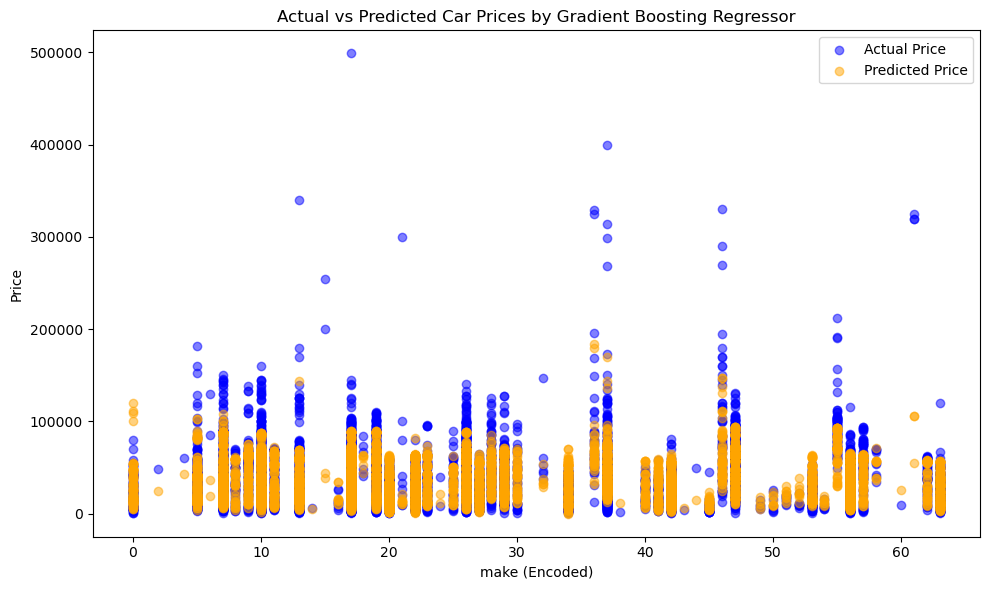

In [520]:
# Train a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
model_and_plot_actual_vs_predicted(gb_model, X_test, y_test,'make','Actual vs Predicted Car Prices by Gradient Boosting Regressor')

### Using Linear Regression

Mean Absolute Error: 14928.747380427616
Root Mean Squared Error: 23972.958130817424
Mean Absolute Percentage Error: 93.18628592042285
R-squared: 0.3161321117300545


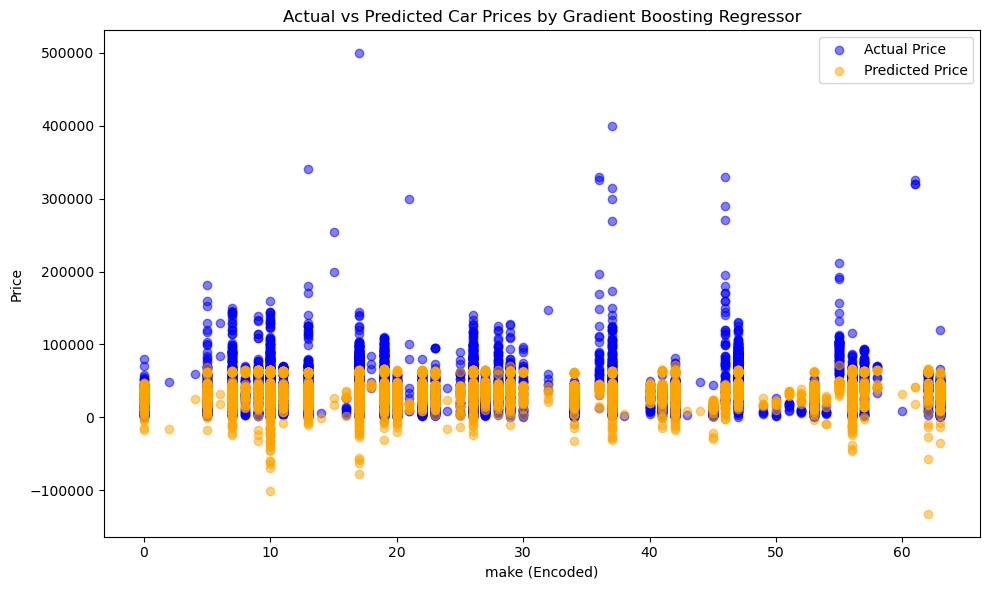

In [521]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
model_and_plot_actual_vs_predicted(lr_model, X_test, y_test,'make','Actual vs Predicted Car Prices by Gradient Boosting Regressor')

## Conclusion

After evaluating several regression models, including the Random Forest Regressor, Gradient Boosting Regressor, and Linear Regression, the Random Forest Regressor consistently demonstrated superior performance. It yielded the lowest Mean Absolute Error, Root Mean Squared Error, and Mean Absolute Percentage Error, while also achieving the highest R-squared value.

The developed Random Forest model serves as a valuable tool for predicting car prices, offering practical applications for buyers and sellers in the automotive market. By inputting relevant car specifications, users can receive an estimated price range, enabling informed decision-making.

## Future Improvement

1. Enhancing data preprocessing techniques, such as handling outliers, missing values, and normalization, could further improve model accuracy and robustness.
2. Further data collection: Incorporating additional data sources, such as vehicle history reports, ownership records, and market trends, could enhance the model's accuracy and reliability.
3. Advanced techniques: Experimenting with different algorithms beyond the ones evaluated here, such as Support Vector Machines, Neural Networks, and XGBoost, could offer insights into whether an alternative model could provide even better predictions.